## K-Means (with ML libraries)

### Number of optimal `K` clusters

One of the main weaknesses of the K-Means algorithm is that the number of clusters $K$ must be known **a priori**, so this number becomes a hyperparameter because it cannot be obtained from the algorithm **per se** . Although there is no exact analytical method to estimate this number, there are different heuristics to solve the problem informally (all subject to subjectivity to a greater or lesser degree). These methods are based on the analysis of the behavior of different metrics that are generally classified into internal validation metrics and external validation metrics (in the latter, knowledge of the cluster number is required before the analysis and all indicators can be derived from the contingency matrix). In general, what is done is to use a set of training data to determine the hyperparameter and then different scenarios are tested ("stressing the data") to be able to determine which of all the indicators perform in the best way to be able to validate or reject the choice and strengthen the analysis.

In our case, of all the techniques we will analyze two of the best known, known as the elbow method and the silhouette method.

#### Elbow Method

The elbow method is a technique used to determine the optimal number of clusters in a data set to apply the K-Means algorithm. It is based on the idea that increasing the number of clusters will improve the explained variance, but at a certain point, the benefit of adding more clusters will decrease significantly, forming a curve that resembles a cubit.

The procedure to use the elbow method is as follows:

1. Run the K-Means algorithm on the data set with a range of values for the number of clusters (for example, from k=1 to k=10).
2. For each value of k, calculate the sum of the squares of the intra-cluster distances (SSD), which is a metric that indicates how compact the clusters are.
3. Plot the k values against the SSD.
4. Find the point on the graph where the SSD begins to flatten, forming an "elbow." This point indicates the optimal number of clusters.

The SSD formula for a set of clusters $C_1, C_2, \dots, C_k$ in a set of $n$ observations and a feature space of $p$ dimensions is:

$$SSD = \sum _{i=1}^K \sum _{\mathbf{x} \in C_i} ||\mathbf{x} - \boldsymbol{\mu}_i||^2$$

where

- $\mathbf{x}$ is a point in cluster $C_i$
- $\boldsymbol{\mu}_i$ is the centroid of cluster $C_i$

In [6]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Avoid code suggestions
import warnings
warnings.filterwarnings('ignore')

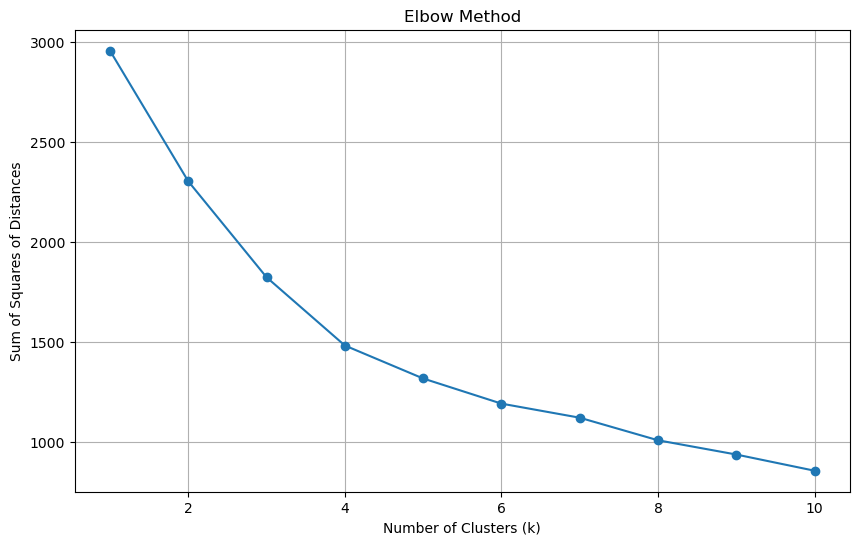

In [7]:
# Generate random data
np.random.seed(3)
n = 1000 # Number of observations
p = 3 # Number of dimensions
X = np.random.randn(n, p) # Data generation

# Calculate the sum of the squares of the intra-cluster distances (SSD) for k between 1 and 10
ssd = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, random_state=0)
     kmeans.fit(X)
     ssd.append(kmeans.inertia_)

# Graph the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squares of Distances')
plt.grid(True)
plt.show()

#### Silhouette Method

The silhouette method is another technique to determine the optimal number of clusters in K-Means. Unlike the elbow method, the silhouette method provides a more direct measure of cluster quality, taking into account both intra-cluster cohesion and inter-cluster separation.

The procedure to use the silhouette method is as follows:

1. Run the K-Means algorithm on the data set with a range of values for the number of clusters (for example, from k=2 to k=10).
2. Calculate the silhouette coefficient for each point in the data set and average these values to obtain the average silhouette coefficient for that value of k.
3. Repeat steps 1 and 2 for different values of k.
4. Select the value of k that has the highest average silhouette coefficient.

The silhouette coefficient for a point $i$ is calculated as:

$$s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}$$

Where:

- $a(i)$ is the average distance from point $i$ to the other points in the same cluster.

$$a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i}, \; i\neq j}d(i,j)$$

- $b(i)$ is the average minimum distance from point i to points in other clusters, minimized over clusters different from that of $i$.

$$b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)$$

Then $s(i)$ can be written as

$$s(i)={\begin{cases}1-a(i)/b(i),&{\mbox{si }}a(i)<b(i)\\0,&{\mbox{si }}a(i)=b(i)\\b(i)/a(i)-1,&{\mbox{si }}a(i)>b(i)\\\end{cases}}$$

The silhouette coefficient varies between $-1$ and $1$, that is, $-1\leq s(i)\leq 1$. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

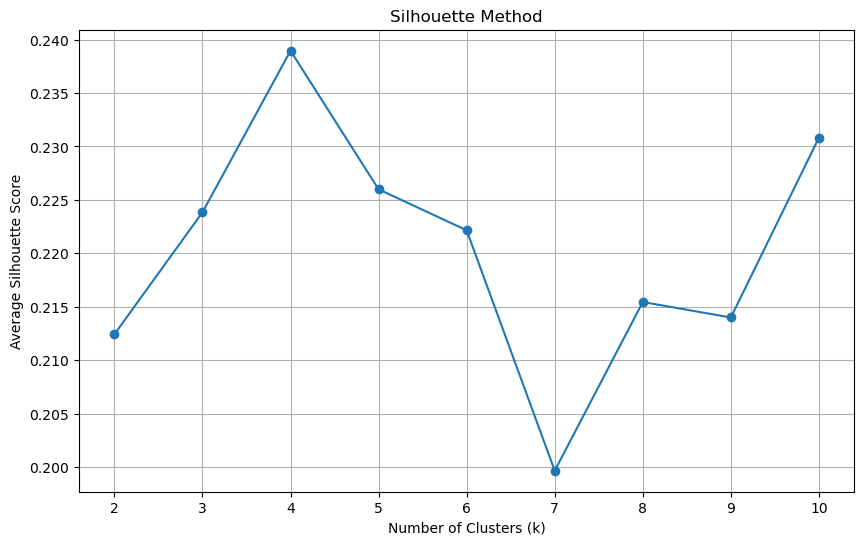

In [10]:
# Calculate the silhouette coefficient for k between 2 and 10
silhouette_scores = []
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, random_state=0)
     labels = kmeans.fit_predict(X)
     silhouette_avg = silhouette_score(X, labels)
     silhouette_scores.append(silhouette_avg)

# Graph the silhouette method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

## Full example

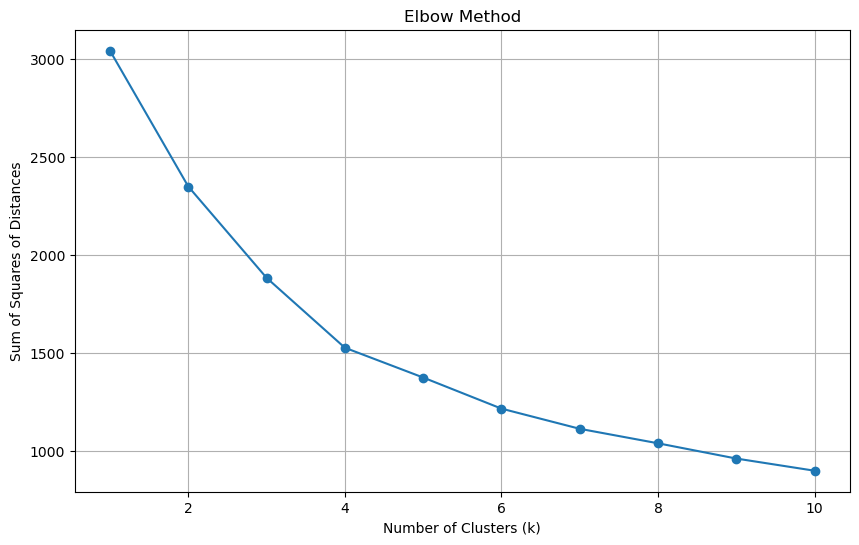

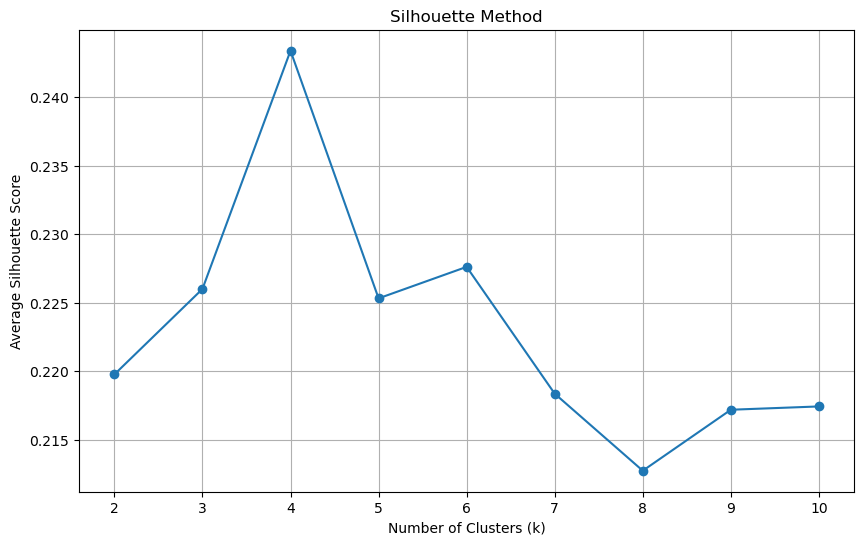

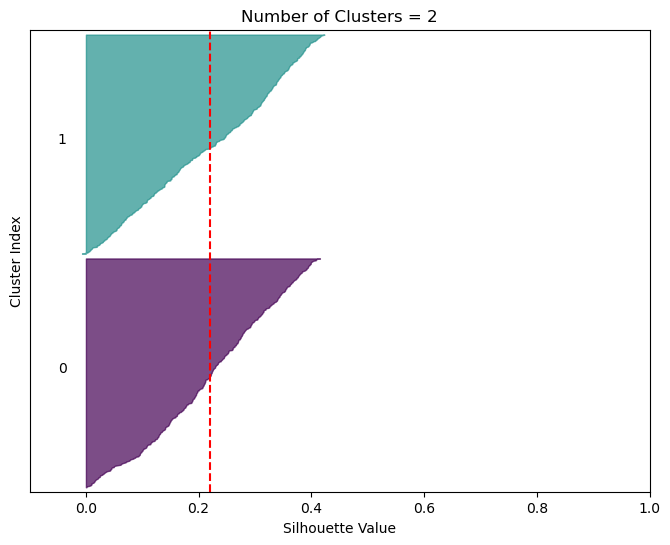

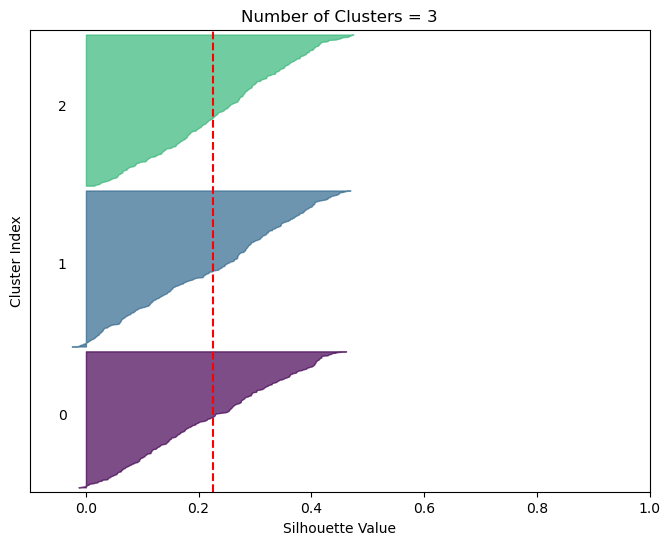

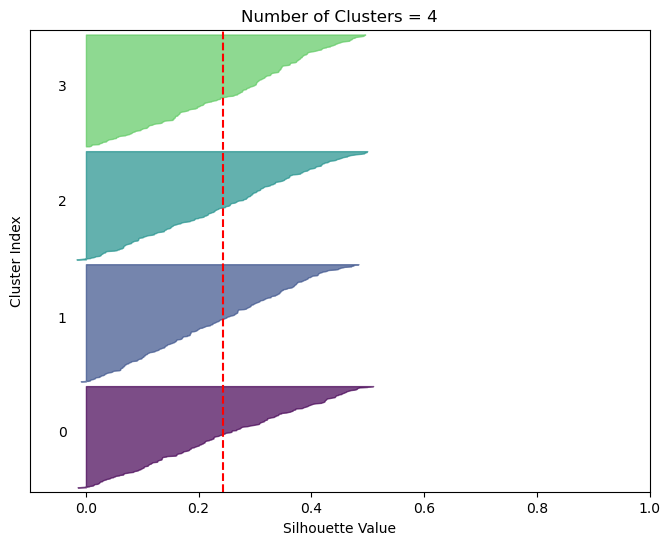

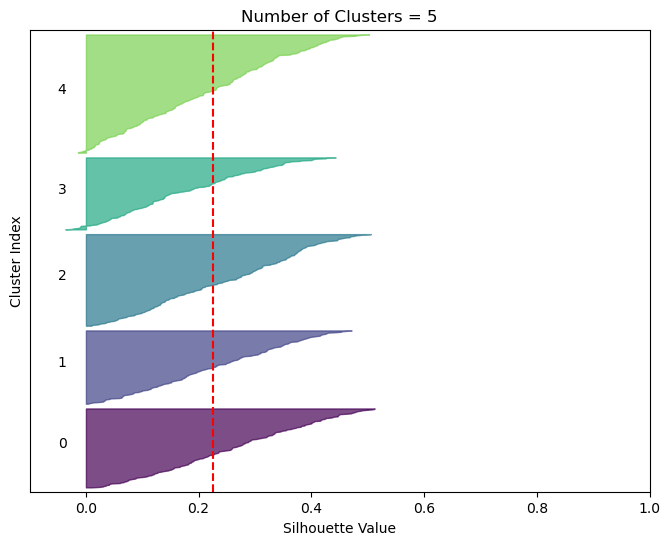

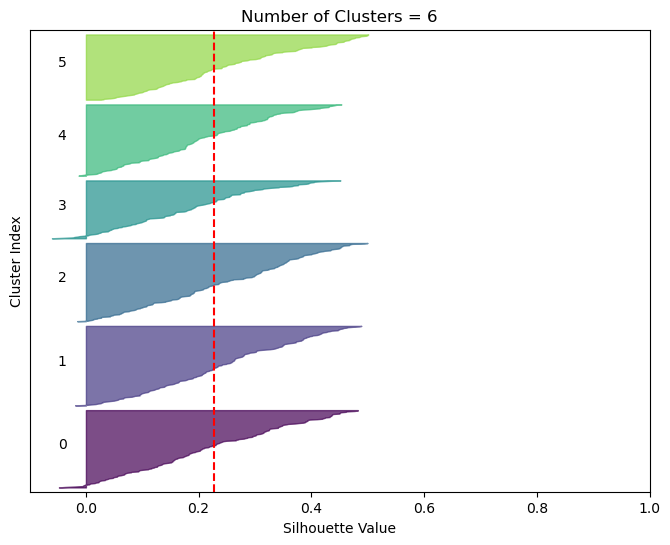

For cluster 0, the average silhouette is 0.22009
For cluster 1, the average silhouette is 0.21940
For 2 clusters, the average silhouette score is: 0.21976

For cluster 0, the average silhouette is 0.21866
For cluster 1, the average silhouette is 0.21925
For cluster 2, the average silhouette is 0.23955
For 3 clusters, the average silhouette score is: 0.22599

For cluster 0, the average silhouette is 0.24189
For cluster 1, the average silhouette is 0.22855
For cluster 2, the average silhouette is 0.24488
For cluster 3, the average silhouette is 0.25881
For 4 clusters, the average silhouette score is: 0.24338

For cluster 0, the average silhouette is 0.26110
For cluster 1, the average silhouette is 0.22884
For cluster 2, the average silhouette is 0.24808
For cluster 3, the average silhouette is 0.17565
For cluster 4, the average silhouette is 0.21181
For 5 clusters, the average silhouette score is: 0.22531

For cluster 0, the average silhouette is 0.21969
For cluster 1, the average silhou

In [12]:
# Generate random 3D data
np.random.seed(83)
n = 1000 # Number of observations
p = 3 # Number of dimensions
X = np.random.randn(n, p) # Data generation

# Calculate the elbow method
ssd = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, random_state=0)
     kmeans.fit(X)
     ssd.append(kmeans.inertia_)

# Graph the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squares of Distances')
plt.grid(True)
plt.show()

# Calculate silhouette score
silhouette_scores = []
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, random_state=0)
     labels = kmeans.fit_predict(X)
     silhouette_avg = silhouette_score(X, labels)
     silhouette_scores.append(silhouette_avg)

# Graph the silhouette method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

# Plot the silhouettes for different numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
     # Initialize the K-Means model
     kmeans = KMeans(n_clusters=n_clusters, random_state=0)
     cluster_labels = kmeans.fit_predict(X)

     # Calculate silhouette score
     silhouette_avg = silhouette_score(X, cluster_labels)

     # Calculate silhouette scores for each point
     sample_silhouette_values = silhouette_samples(X, cluster_labels)

     # Create a figure with subgraphs
     plt.figure(figsize=(8, 6))
     plt.title(f'Number of Clusters = {n_clusters}')
     plt.xlabel('Silhouette Value')
     plt.ylabel('Cluster Index')

     y_lower = 10

     for i in range(n_clusters):
         # Add the silhouettes of the clusters
         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
         ith_cluster_silhouette_values.sort()

         size_cluster_i = ith_cluster_silhouette_values.shape[0]
         y_upper = y_lower + size_cluster_i

         color = plt.cm.viridis(float(i) / n_clusters)
         plt.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                           ith_cluster_silhouette_values, 
                           facecolor=color, edgecolor=color, 
                           alpha=0.7)

         # Cluster labels in the graph
         plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

         # Calculate the next position
         y_lower = y_upper + 10

     # Line for average silhouette value
     plt.axvline(x=silhouette_avg, color="red", linestyle="--")
     plt.yticks([])
     plt.xlim([-0.1, 1])
     plt.ylim([0, len(X) + (n_clusters + 1) * 10])

     plt.show()

# Plot the silhouettes for different numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
     # Initialize the K-Means model
     kmeans = KMeans(n_clusters=n_clusters, random_state=0)
     cluster_labels = kmeans.fit_predict(X)

     # Calculate silhouette score
     silhouette_avg = silhouette_score(X, cluster_labels)

     # Calculate silhouette scores for each point
     sample_silhouette_values = silhouette_samples(X, cluster_labels)

     # Calculate the average of the silhouette for each cluster
     for i in range(n_clusters):
         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
         avg_silhouette_value = np.mean(ith_cluster_silhouette_values)
         print(f'For cluster {i}, the average silhouette is {avg_silhouette_value:.5f}')

     print(f'For {n_clusters} clusters, the average silhouette score is: {silhouette_avg:.5f}\n')

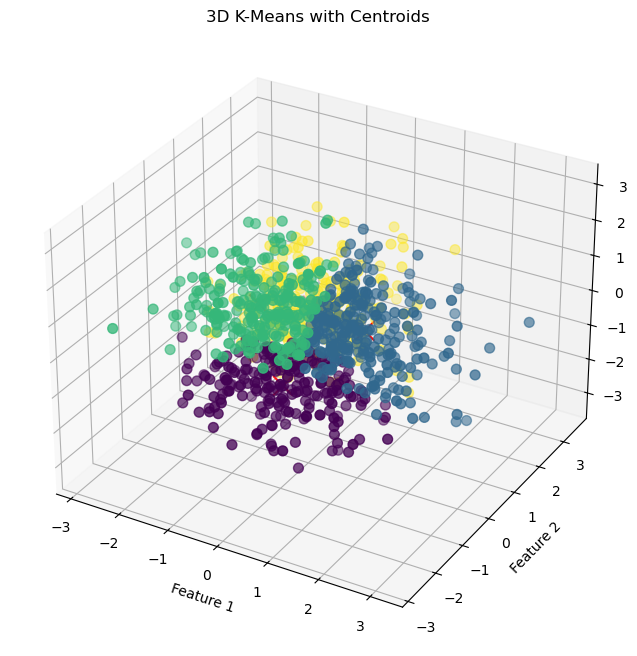

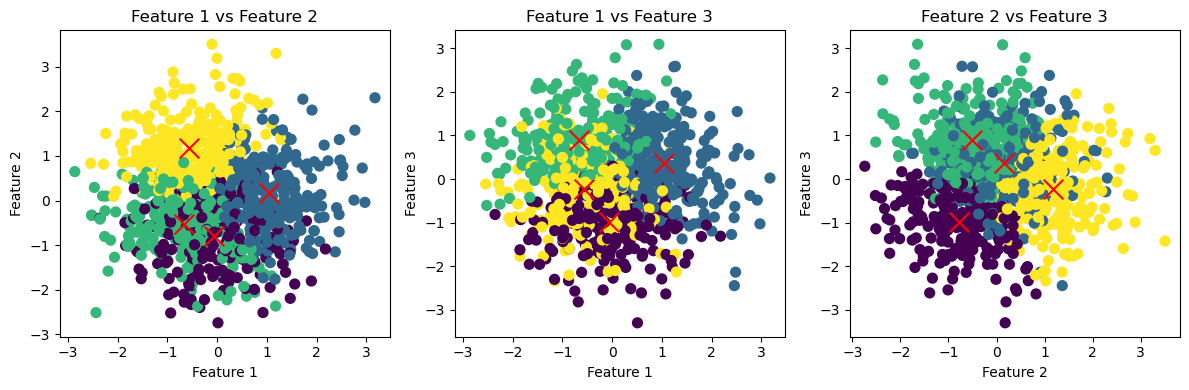

In [13]:
# Define the number of clusters
num_clusters = 4

# Initialize the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Train the model
kmeans.fit(X)

# Get the centroids
centroids = kmeans.cluster_centers_

# Get cluster labels
labels = kmeans.labels_

# Plot data and centroids in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D K-Means with Centroids')

plt.show()

# Graph in 2D combining the variables in pairs
plt.figure(figsize=(12, 4))

# Plot the combination of Feature 1 and Feature 2
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs Feature 2')

# Plot the combination of Feature 1 and Feature 3
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 2], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 2], c='red', marker='x', s=200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Feature 1 vs Feature 3')

# Plot the combination of Feature 2 and Feature 3
plt.subplot(133)
plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200)
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.title('Feature 2 vs Feature 3')

plt.tight_layout()
plt.show()